# This is Jeopardy!

#### Overview

This project is slightly different than others you have encountered thus far. Instead of a step-by-step tutorial, this project contains a series of open-ended requirements which describe the project you'll be building. There are many possible ways to correctly fulfill all of these requirements, and you should expect to use the internet, Codecademy, and/or other resources when you encounter a problem that you cannot easily solve.

#### Project Goals

You will work to write several functions that investigate a dataset of _Jeopardy!_ questions and answers. Filter the dataset for topics that you're interested in, compute the average difficulty of those questions, and train to become the next Jeopardy champion!

## Prerequisites

In order to complete this project, you should have completed the Pandas lessons in the <a href="https://www.codecademy.com/learn/paths/analyze-data-with-python">Analyze Data with Python Skill Path</a>. You can also find those lessons in the <a href="https://www.codecademy.com/learn/data-processing-pandas">Data Analysis with Pandas course</a> or the <a href="https://www.codecademy.com/learn/paths/data-science/">Data Scientist Career Path</a>.

Finally, the <a href="https://www.codecademy.com/learn/practical-data-cleaning">Practical Data Cleaning</a> course may also be helpful.

## Project Requirements

1. We've provided a csv file containing data about the game show _Jeopardy!_ in a file named `jeopardy.csv`. Load the data into a DataFrame and investigate its contents. Try to print out specific columns.

   Note that in order to make this project as "real-world" as possible, we haven't modified the data at all - we're giving it to you exactly how we found it. As a result, this data isn't as "clean" as the datasets you normally find on Codecademy. More specifically, there's something odd about the column names. After you figure out the problem with the column names, you may want to rename them to make your life easier for the rest of the project.
   
   In order to display the full contents of a column, we've added this line of code for you:
   
   ```py
   pd.set_option('display.max_colwidth', None)
   ```

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

pd.set_option('display.max_colwidth', None)

df = pd.read_csv("jeopardy.csv")
df.columns = ["show_num", "air_date", "round", "category", "value", "question", "answer"]
df

,show_num,air_date,round,category,value,question,answer
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was under house arrest for espousing this man's theory",Copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,"No. 2: 1912 Olympian; football star at Carlisle Indian School; 6 MLB seasons with the Reds, Giants & Braves",Jim Thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,"The city of Yuma in this state has a record average of 4,055 hours of sunshine each year",Arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", this company served its billionth burger",McDonald's
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Constitution of Mass., second President of the United States",John Adams
...,...,...,...,...,...,...,...
216925,4999,2006-05-11,Double Jeopardy!,RIDDLE ME THIS,$2000,This Puccini opera turns on the solution to 3 riddles posed by the heroine,Turandot
216926,4999,2006-05-11,Double Jeopardy!,"""T"" BIRDS",$2000,"In North America this term is properly applied to only 4 species that are crested, including the tufted",a titmouse
216927,4999,2006-05-11,Double Jeopardy!,AUTHORS IN THEIR YOUTH,$2000,"In Penny Lane, where this ""Hellraiser"" grew up, the barber shaves another customer--then flays him alive!",Clive Barker
216928,4999,2006-05-11,Double Jeopardy!,QUOTATIONS,$2000,"From Ft. Sill, Okla. he made the plea, Arizona is my land, my home, my father's land, to which I now ask to... return""",Geronimo


2. Write a function that filters the dataset for questions that contains all of the words in a list of words. For example, when the list `["King", "England"]` was passed to our function, the function returned a DataFrame of 49 rows. Every row had the strings `"King"` and `"England"` somewhere in its `" Question"`.

   Test your function by printing out the column containing the question of each row of the dataset.

In [3]:
def word_finder(word_list):
    s1 = ""
    i = 0
    words = word_list
    while i < len(words):
        if i == 0:
            s1=df[df["question"].str.contains(words[i])]
        else:
            s1=s1[s1["question"].str.contains(words[i])]
        i+=1
    return s1.question

word_finder(["Boston", "boat"])

46197    (<a href="http://www.j-archive.com/media/2005-09-20_J_22.jpg" target="_blank">Cheryl of the Clue Crew points to a coconut shell enshrined in the JFK Library & Museum in Boston, MA.</a>)  This is the actual piece of coconut on which John F. Kennedy <a href="http://www.j-archive.com/media/2005-09-20_J_22a.jpg" target="_blank">carved a plea for help</a>  after this boat was cut in half during World War II
56196                                                                                                                                                                                                                                                                                                                        This waterway that allows boats to avoid the open sea stretches from Boston to Brownsville, Texas
Name: question, dtype: object

3. Test your original function with a few different sets of words to try to find some ways your function breaks. Edit your function so it is more robust.

   For example, think about capitalization. We probably want to find questions that contain the word `"King"` or `"king"`.
   
   You may also want to check to make sure you don't find rows that contain substrings of your given words. For example, our function found a question that didn't contain the word `"king"`, however it did contain the word `"viking"` &mdash; it found the `"king"` inside `"viking"`. Note that this also comes with some drawbacks &mdash; you would no longer find questions that contained words like `"England's"`.

In [4]:
def word_finder(word_list):
    s1 = ""
    i = 0
    words = word_list
    while i < len(words):
        if i == 0:
            s1=df[df["question"].str.contains(" " + words[i].capitalize() + " ")]
            s1=pd.concat([s1, df[df["question"].str.contains(" " + words[i].lower() + " ")]])
        else:
            s2=""
            s2=s1[s1["question"].str.contains(" " + words[i].capitalize() + " ")]
            s2=pd.concat([s2, s1[s1["question"].str.contains(" " + words[i].lower() + " ")]])
            s1=s2
        i+=1
    return s1.question

word_finder(["dogs", "cat"])

78924     In Sheila Burnford's "Incredible Journey", 2 dogs & a cat trek across this country
212749             In a 1996 sequel to this film, 2 dogs & a cat are "Lost In San Francisco"
Name: question, dtype: object

4. We may want to eventually compute aggregate statistics, like `.mean()` on the `" Value"` column. But right now, the values in that column are strings. Convert the`" Value"` column to floats. If you'd like to, you can create a new column with float values.

   Now that you can filter the dataset of question, use your new column that contains the float values of each question to find the "difficulty" of certain topics. For example, what is the average value of questions that contain the word `"King"`?
   
   Make sure to use the dataset that contains the float values as the dataset you use in your filtering function.

In [5]:
def value_finder(word_list):
    s1 = ""
    i = 0
    words = word_list
    while i < len(words):
        if i == 0:
            s1=df[df["question"].str.contains(" " + words[i].capitalize() + " ")]
            s1=pd.concat([s1, df[df["question"].str.contains(" " + words[i].lower() + " ")]])
        else:
            s2=""
            s2=s1[s1["question"].str.contains(" " + words[i].capitalize() + " ")]
            s2=pd.concat([s2, s1[s1["question"].str.contains(" " + words[i].lower() + " ")]])
            s1=s2
        i+=1
    s1["value"] = s1.value.str.strip("$").astype(float)
    print("the average dollar value of a question containg the words: " + " and ".join(words) + " is $" + str(round(s1.value.mean(), 2)))
    # return s1.value

value_finder(["fish", "water"])

the average dollar value of a question containg the words: fish and water is $764.29


5. Write a function that returns the count of unique answers to all of the questions in a dataset. For example, after filtering the entire dataset to only questions containing the word `"King"`, we could then find all of the unique answers to those questions. The answer "Henry VIII" appeared 55 times and was the most common answer.

In [6]:
def answer_finder(word_list):
    s1 = ""
    i = 0
    words = word_list
    while i < len(words):
        if i == 0:
            s1=df[df["question"].str.contains(" " + words[i].capitalize() + " ")]
            s1=pd.concat([s1, df[df["question"].str.contains(" " + words[i].lower() + " ")]])
        else:
            s2=""
            s2=s1[s1["question"].str.contains(" " + words[i].capitalize() + " ")]
            s2=pd.concat([s2, s1[s1["question"].str.contains(" " + words[i].lower() + " ")]])
            s1=s2
        i+=1
    answers = list(s1.answer.unique())
    count_answers = []
    i = 0
    while i < len(answers):
        word = answers[i]
        j=0
        count = 0
        while j < len(answers):
            if word == answers[j]:
                count +=1
            j+=1
        count_answers.append(count)
        i+=1
    i=0
    while i < len(answers):
        print("the answer: \"" + answers[i] + "\" occurs " + str(count_answers[i]) + " time(s)." )
        i+=1

answer_finder(["king"])

the answer: "sitcom" occurs 1 time(s).
the answer: "Poland" occurs 1 time(s).
the answer: "Crusades" occurs 1 time(s).
the answer: "Tristan" occurs 1 time(s).
the answer: "Queen of Sheba" occurs 1 time(s).
the answer: "Merlin" occurs 1 time(s).
the answer: "Avalon" occurs 1 time(s).
the answer: "Albania" occurs 1 time(s).
the answer: "tobacco" occurs 1 time(s).
the answer: "a Philistine" occurs 1 time(s).
the answer: "Portugal" occurs 1 time(s).
the answer: "Romania" occurs 1 time(s).
the answer: "Skull Island" occurs 1 time(s).
the answer: ""The King And I"" occurs 1 time(s).
the answer: "Philately (stamp collecting)" occurs 1 time(s).
the answer: "Maximum Overdrive" occurs 1 time(s).
the answer: "Dr. Seuss" occurs 1 time(s).
the answer: "Italy" occurs 1 time(s).
the answer: "Hull House (in Chicago)" occurs 1 time(s).
the answer: "Morocco" occurs 1 time(s).
the answer: "Honolulu" occurs 1 time(s).
the answer: "Thugmuffin C" occurs 1 time(s).
the answer: "England" occurs 1 time(s).
the

6. Explore from here! This is an incredibly rich dataset, and there are so many interesting things to discover. There are a few columns that we haven't even started looking at yet. Here are some ideas on ways to continue working with this data:

 * Investigate the ways in which questions change over time by filtering by the date. How many questions from the 90s use the word `"Computer"` compared to questions from the 2000s?
 * Is there a connection between the round and the category? Are you more likely to find certain categories, like `"Literature"` in Single Jeopardy or Double Jeopardy?
 * Build a system to quiz yourself. Grab random questions, and use the <a href="https://docs.python.org/3/library/functions.html#input">input</a> function to get a response from the user. Check to see if that response was right or wrong.

['2004', '2010', '2000', '2006', '2009', '1996', '2007', '1997', '2002', '2003', '2001', '1990', '1999', '2008', '2011', '2005', '1998', '2012', '1992', '1986', '1985', '1991', '1993', '1994', '1988', '1987', '1995', '1984', '1989']


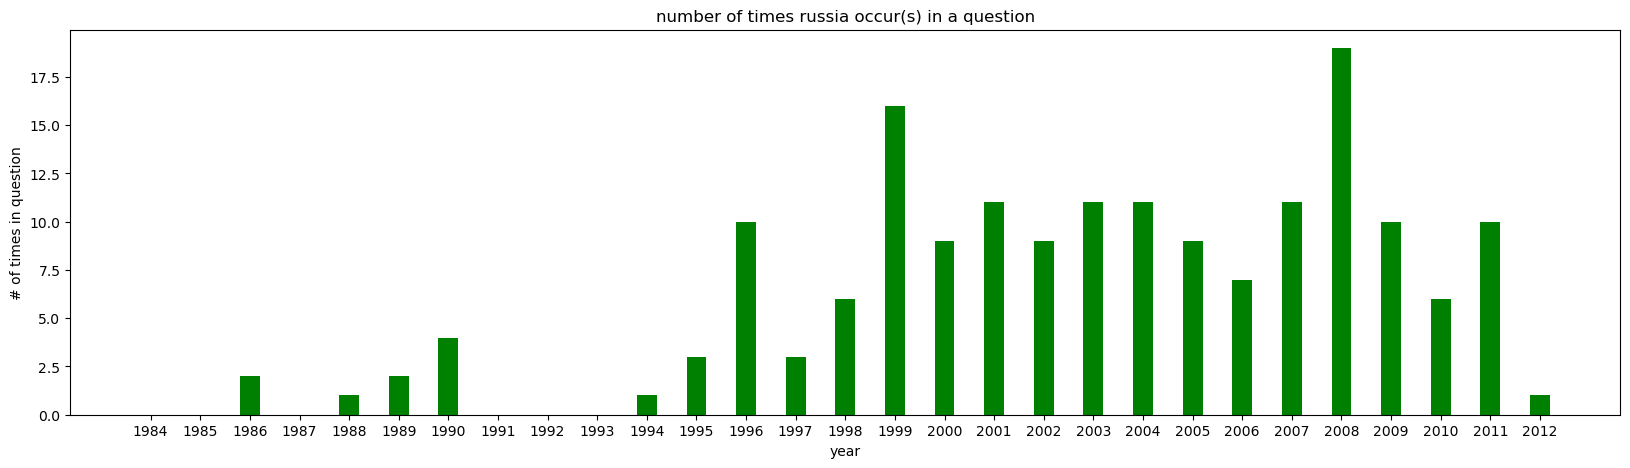

In [7]:
#looking at how many times a word appears in a question per year

def date_finder(word_list):
    s1 = ""
    i = 0
    words = word_list
    while i < len(words):
        if i == 0:
            s1=df[df["question"].str.contains(" " + words[i].capitalize() + " ")]
            s1=pd.concat([s1, df[df["question"].str.contains(" " + words[i].lower() + " ")]])
        else:
            s2=""
            s2=s1[s1["question"].str.contains(" " + words[i].capitalize() + " ")]
            s2=pd.concat([s2, s1[s1["question"].str.contains(" " + words[i].lower() + " ")]])
            s1=s2
        i+=1
    air_dates = list(df.air_date)
    years = []
    for date in air_dates:
        years.append(date[:4])
    years_for_x_axis = []
    for year in years:
         if year not in years_for_x_axis:
                years_for_x_axis.append(year)
    print(years_for_x_axis)
    question_air_dates = list(s1.air_date)
    question_years = []
    for date in question_air_dates:
        question_years.append(date[:4])
    year_dict = {}
    for year in years_for_x_axis:
        count=0
        i=0
        while i < len(question_years):
            if year == question_years[i]:
                count+=1
            i+=1
        year_dict[year] = count
    myKeys = list(year_dict.keys())
    myKeys.sort()
    sorted_year_dict = {i: year_dict[i] for i in myKeys} 
    fig = plt.figure(figsize = (20, 5))
    plt.bar(list(sorted_year_dict.keys()), list(sorted_year_dict.values()), color ="green", width = 0.4)
    plt.xlabel("year")
    plt.ylabel("# of times in question")
    plt.title("number of times " + " and ".join(words) + " occur(s) in a question")
    plt.show()
    

date_finder(["russia"])

In [30]:
#quiz game

def its_jeopardy(rounds):
    total_money = 1000
    i=0
    while i < rounds:
        if total_money < 0:
            break
        random_number = random.randint(0, len(df)-1)
        question = df.question[random_number]
        print("you have $" + str(total_money))
        print(df.category[random_number])
        print(question)
        answer = input("what is the answer? ")
#         print(answer)
        if answer.lower() == df.answer[random_number].lower():
            print("correct! you just won " + df.value[random_number])
            total_money += int(df.value[random_number].strip("$"))
        else:
            print("incorrect! you now owe us : " + df.value[random_number] + ". the correct answer was: " + df.answer[random_number])
            total_money -= int(df.value[random_number].strip("$"))
        i+=1
    if total_money > 0:
        print("nice job! you won a total of $" + str(total_money))
    else:
        print("you lost all your money! better luck next time!")
        
its_jeopardy(5)

you have $1000
FROM THE CIA WORLD FACTBOOK
Frequent recent invasions haven't hurt this Asian country's opium crop, the world's largest
what is the answer? afghanistan
correct! you just won $1600
you have $2600
THE SAN FRANCISCO EARTHQUAKE OF 1906
This author from nearby Oakland surveyed the damage & declared, "San Francisco is gone"
what is the answer? jack london
correct! you just won $1000
you have $3600
"CAB"
It's the words of a language; we'll see how good yours is now
what is the answer? voabulary
incorrect! you now owe us : $200. the correct answer was: vocabulary
you have $3400
WASHINGTON STATE
In 1983 WPPSS, the Washington Public Power Supply System, defaulted on a record $2.25 bil. worth of these
what is the answer? kilawatt hours
incorrect! you now owe us : $300. the correct answer was: Bonds
you have $3100
GOING DUTCH
Johann Cruyff, known as the Dutch Major, was tops in this sport & even played for the L.A. Aztecs
what is the answer? soccer
correct! you just won $400
nice jo

## Solution

7. Compare your program to our <a href="https://content.codecademy.com/PRO/independent-practice-projects/jeopardy/jeopardy_solution.zip">sample solution code</a> - remember, that your program might look different from ours (and probably will) and that's okay!

8. Great work! Visit <a href="https://discuss.codecademy.com/t/this-is-jeopardy-challenge-project-python-pandas/462365">our forums</a> to compare your project to our sample solution code. You can also learn how to host your own solution on GitHub so you can share it with other learners! Your solution might look different from ours, and that's okay! There are multiple ways to solve these projects, and you'll learn more by seeing others' code.